# Echo State Network

In [2]:
import numpy as np
from tqdm import tqdm
from time import sleep
from matplotlib import pyplot as plt
%matplotlib inline
from pyESN import ESN

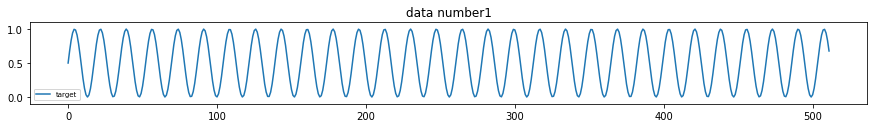

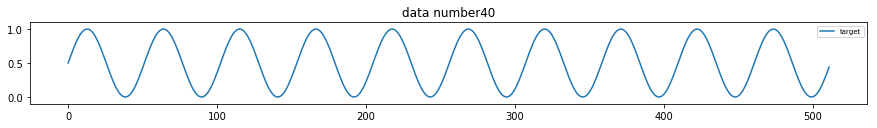

In [7]:
rng = np.random.RandomState(42)
def frequency_generator(K, N):
    frequency = np.zeros((K, N*2, 1))
    z = 0
    n = K+20
    for i in range(K):
        n = n-1
        for j in range(N*2):
            frequency[i][j] = (np.sin(z*n/N)+1)/2
            z = z + 2*np.pi
    return frequency

N = 2**10 # signal length
K = 40 # number of signals

data = frequency_generator(K, N)

scale = 2**10
slide = 2**10
view_scale = 200

for i in (0, K-1):
    window_tr = range(int(N/2))
    plt.figure(figsize=(15,1.5))
    plt.plot(data[i][window_tr], label='target')
    plt.legend(fontsize='x-small')
    plt.title('data number{}'.format(i+1))
    plt.ylim([-0.1, 1.1]);

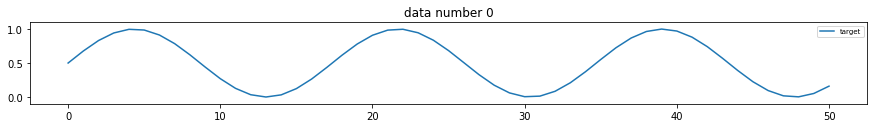

In [8]:
window_tr = range(int(N/20))
plt.figure(figsize=(15,1.5))
plt.plot(data[0][window_tr], label='target')
plt.legend(fontsize='x-small')
plt.title('data number 0')
plt.ylim([-0.1, 1.1]);

In [9]:
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 700,
          spectral_radius = 0.9,
          sparsity = 0.8,
          teacher_scaling = 1.12,
          teacher_shift = -0.7,
          out_activation = np.tanh,
          inverse_out_activation = np.arctanh,
          random_state = rng)

RMSE_train = []
MAE_train  = []
RMSE_first = []

In [10]:
L = 10 # number of learning data

for i in tqdm(range(L)):
    RMSE = 10
    esn.fit(data[i][:scale], data[i][slide:slide+scale], learning_rate=1/(i+1))
    pred_train = esn.predict(data[i][:scale])
    RMSE = np.sqrt(np.mean((pred_train - data[i][slide:slide+scale])**2))
    RMSE_train.append(RMSE)
    pred_first = esn.predict(data[0][:scale])
    RMSE_first.append(np.sqrt(np.mean((pred_first - data[0][slide:slide+scale])**2)))

100%|██████████| 10/10 [00:06<00:00,  1.62it/s]


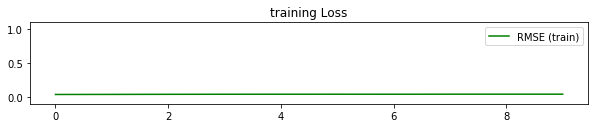

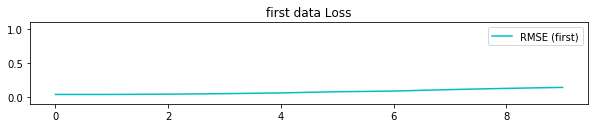

In [11]:
# plot loss over time
plt.figure(figsize=(10, 1.5))
plt.plot(RMSE_train, 'g', label="RMSE (train)")
plt.legend(fontsize='medium')
plt.ylim([-0.1, 1.1])
plt.title('training Loss')

plt.figure(figsize=(10, 1.5))
plt.plot(RMSE_first, 'c', label="RMSE (first)")
plt.legend(fontsize='medium')
plt.ylim([-0.1, 1.1])
plt.title('first data Loss');

100%|██████████| 10/10 [00:01<00:00,  8.05it/s]


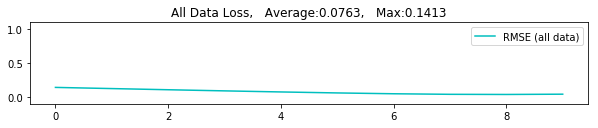

In [12]:
RMSE_alldata = []
for i in tqdm(range(L)):
    pred_train_check = esn.predict(data[i][:scale])
    RMSE_alldata.append(np.sqrt(np.mean((pred_train_check - data[i][slide:slide+scale])**2)))
    
average = np.mean(RMSE_alldata)
maximum = max(RMSE_alldata)

plt.figure(figsize=(10, 1.5))
plt.plot(RMSE_alldata, 'c', label="RMSE (all data)")
plt.legend(fontsize='medium')
plt.ylim([-0.1, 1.1])
plt.title('All Data Loss,   Average:{:.4f},   Max:{:.4f}'.format(average, maximum));

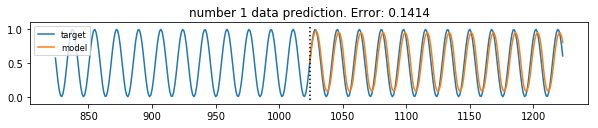

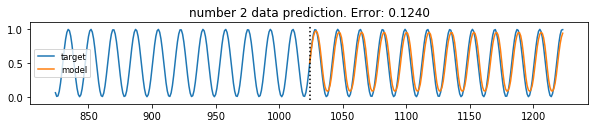

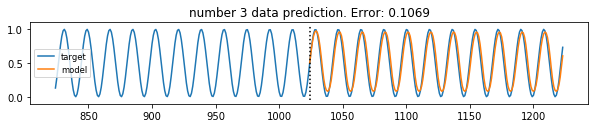

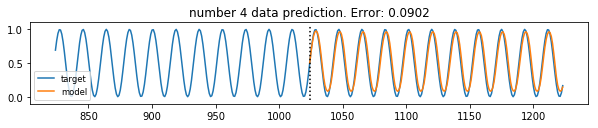

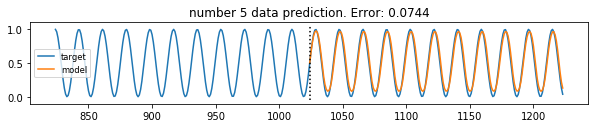

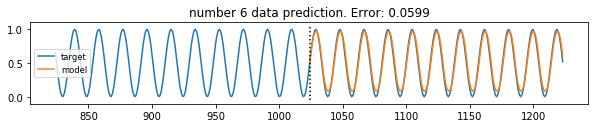

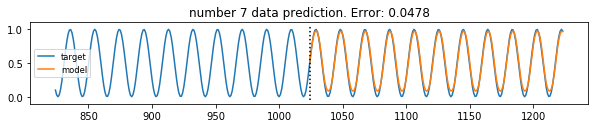

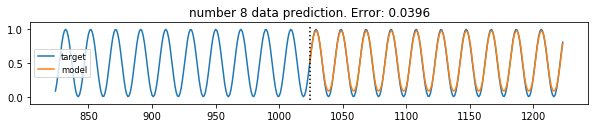

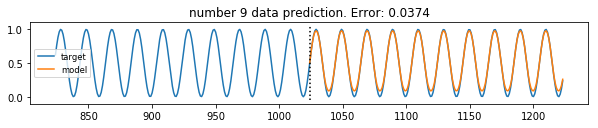

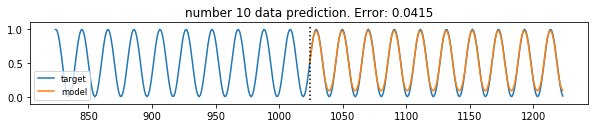

In [14]:
for i in range(L):
    pred_train_check = esn.predict(data[i][:scale])
    error = np.sqrt(np.mean((pred_train_check - data[i][slide:slide+scale])**2))

    plt.figure(figsize=(10, 1.5))
    plt.plot(range(slide-view_scale, slide+view_scale), data[i][slide-view_scale:slide+view_scale], label='target')
    plt.plot(range(slide, slide+view_scale), pred_train_check[:view_scale], label='model')
    lo,hi = plt.ylim()
    plt.plot([slide,slide],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
    plt.legend(fontsize='small')
    plt.title("number {} data prediction. Error: {:.4f}".format(i+1, error));